*Importing the required libraries:*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings as wn
wn.filterwarnings("ignore")

In [2]:
df = pd.read_csv("datasets_13720_18513_insurance(1).csv")

*Basic Check:*
-----------

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Explore the data for higher level information;

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# Here are some statistics for the numerical columns;

df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


- The ranges of values in the numerical columns are seem reasonable too,so we may not have to do much data cleaning correlation .
- The "Charges" columns seems to be significantly skewed however,as the median(50 percentile,it is also know as 2nd quartile) is much lower than the max value.

In [6]:
df.describe(include="O")

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [7]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

*EDA:*
-----
we'll use libraries Matplotlib,Seaborn and Plotly for visualization.

                                             |                                             | [  0%]   00:00 ->…


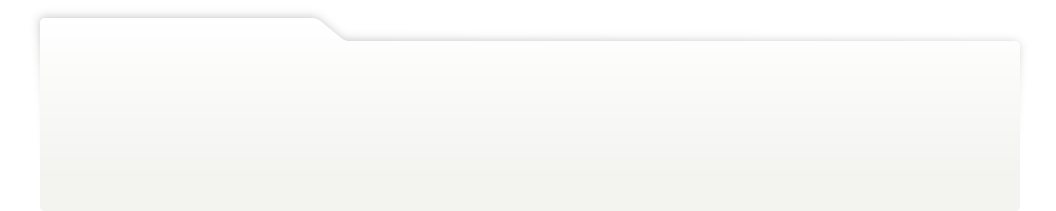
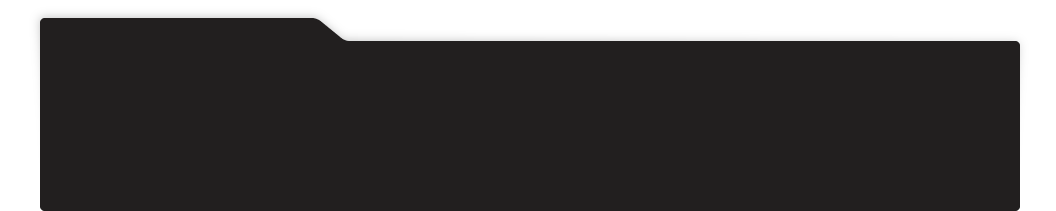
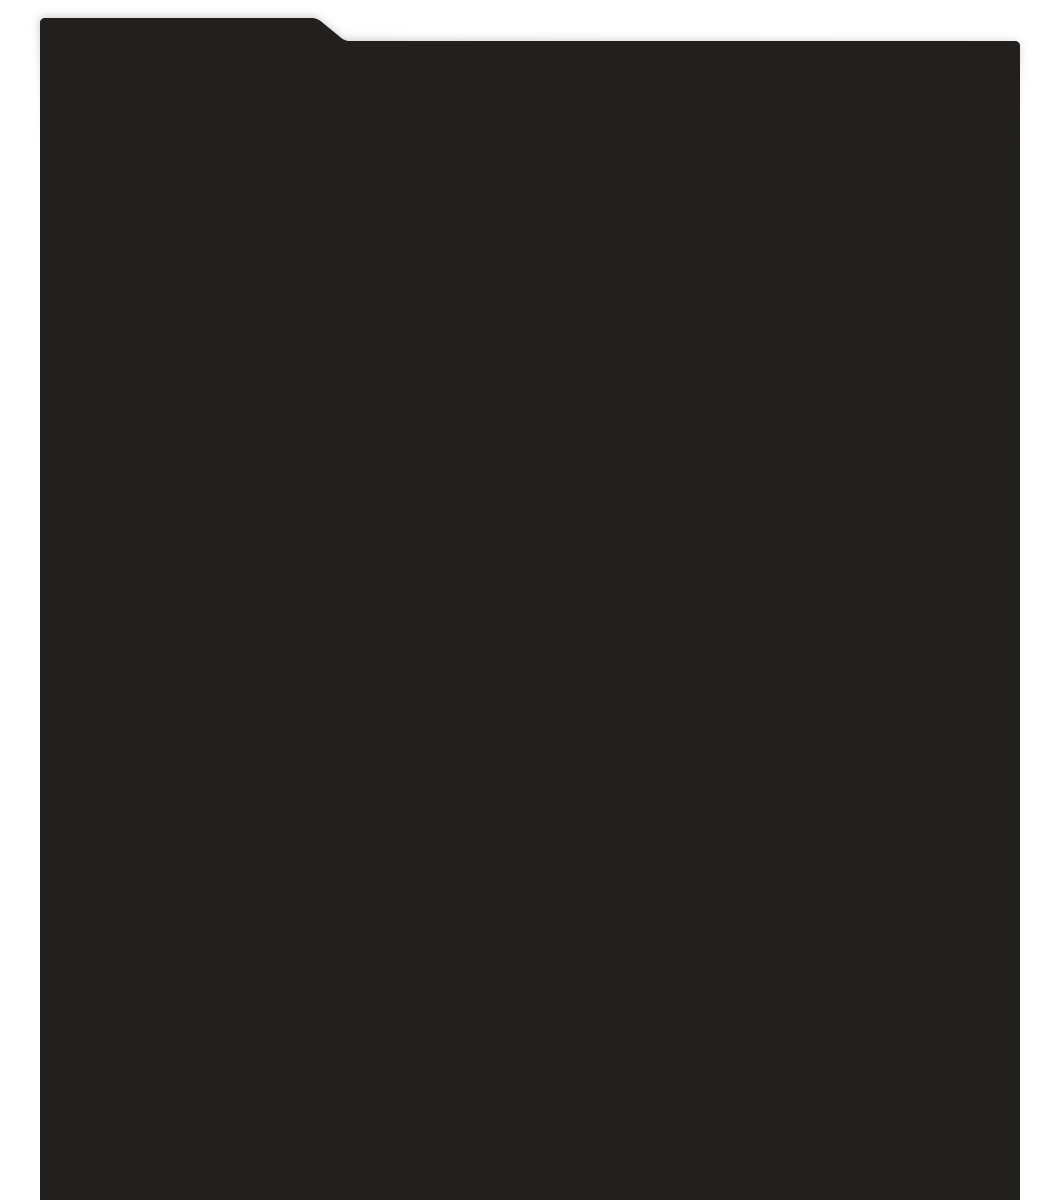
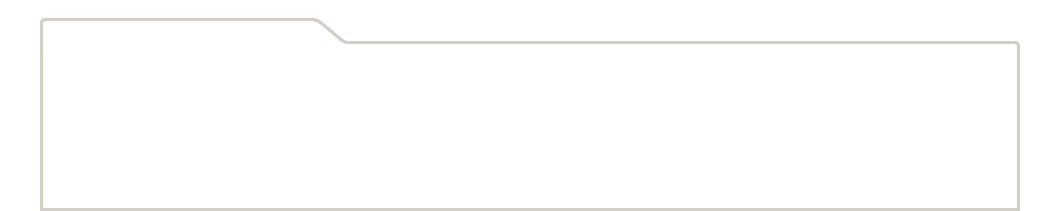
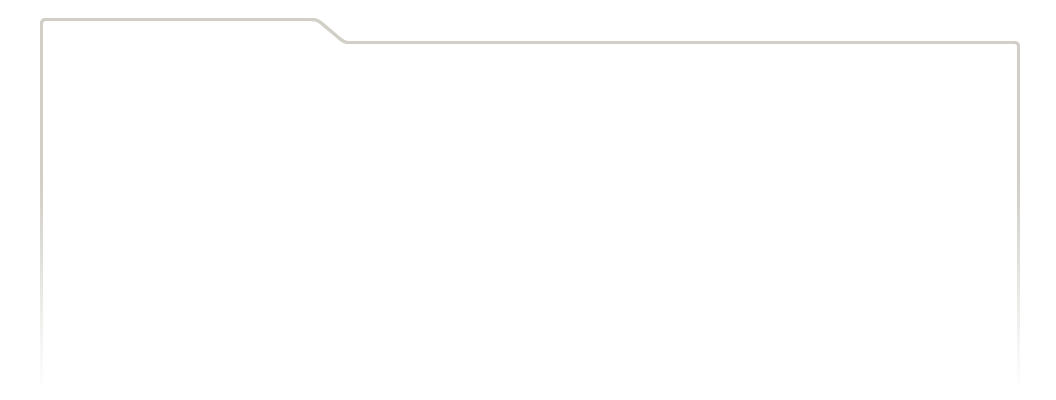
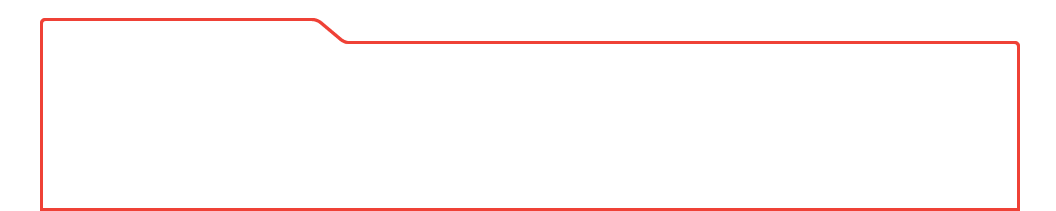
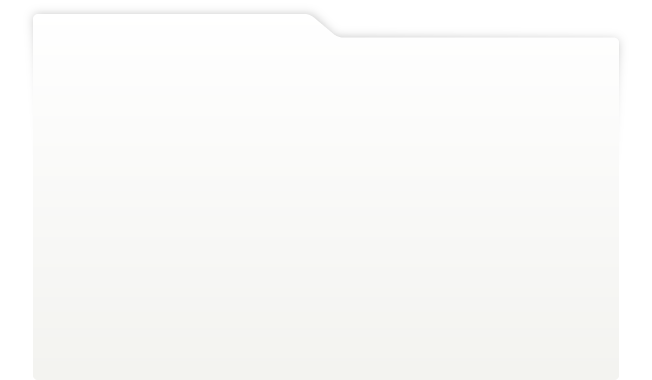
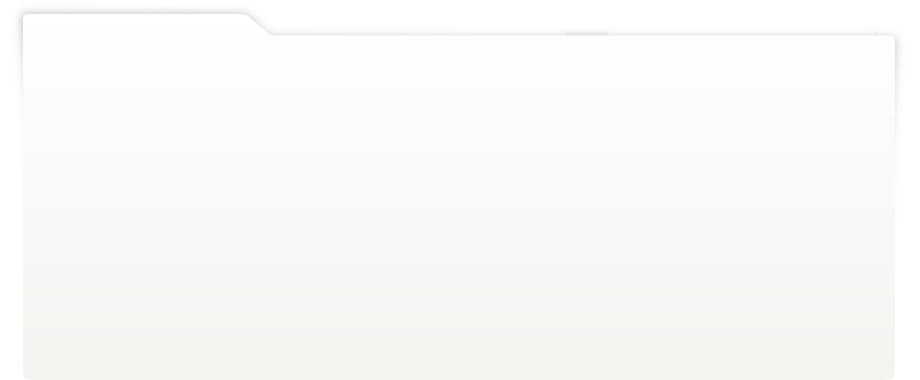
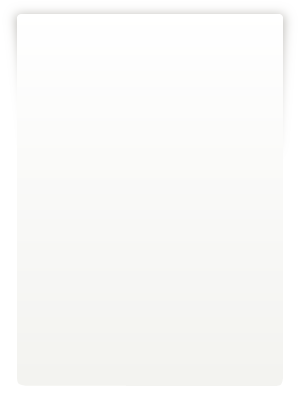
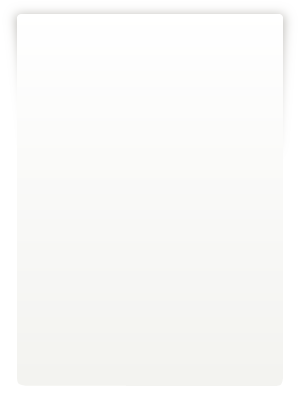
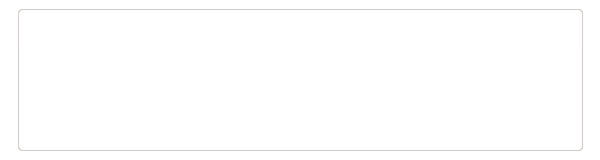
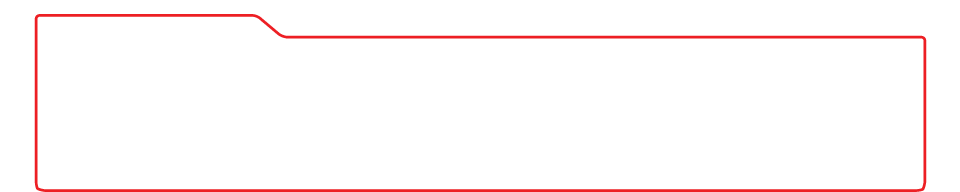
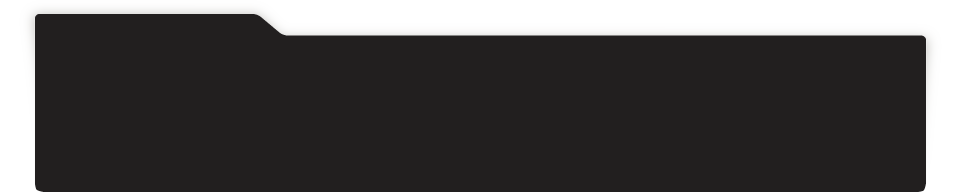
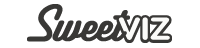
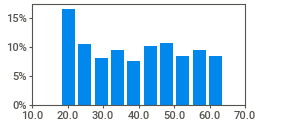
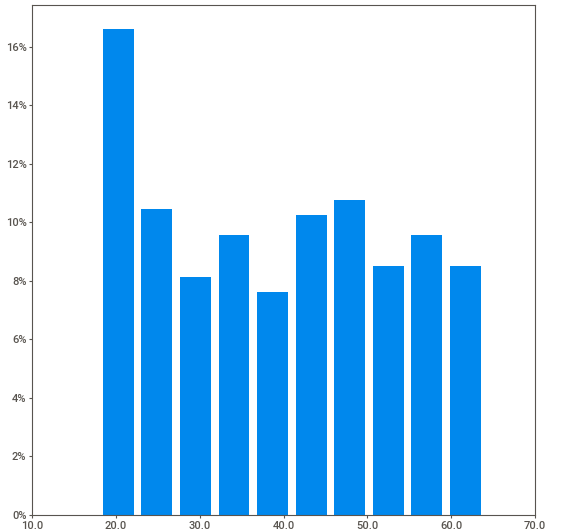
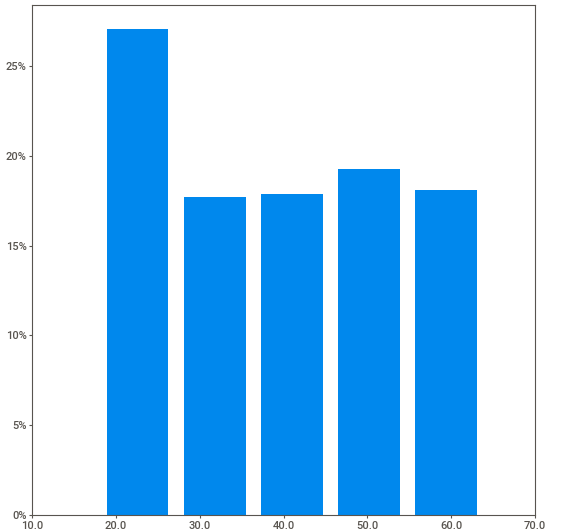
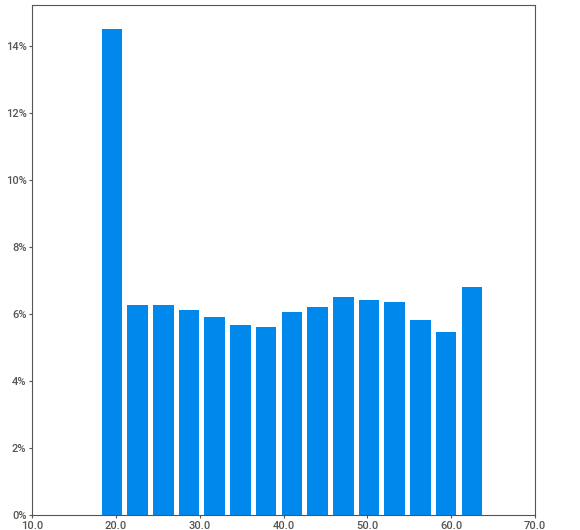
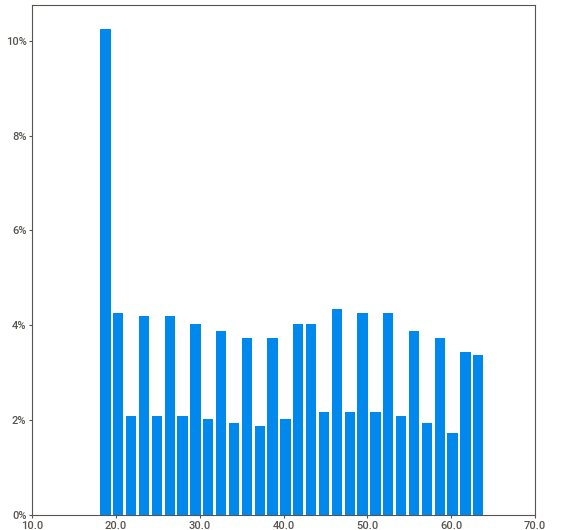
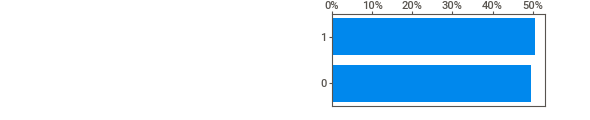
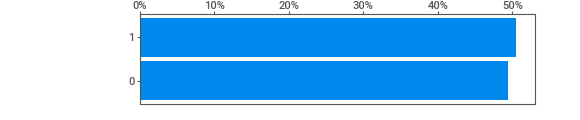
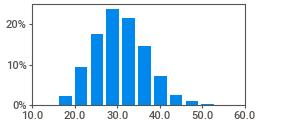
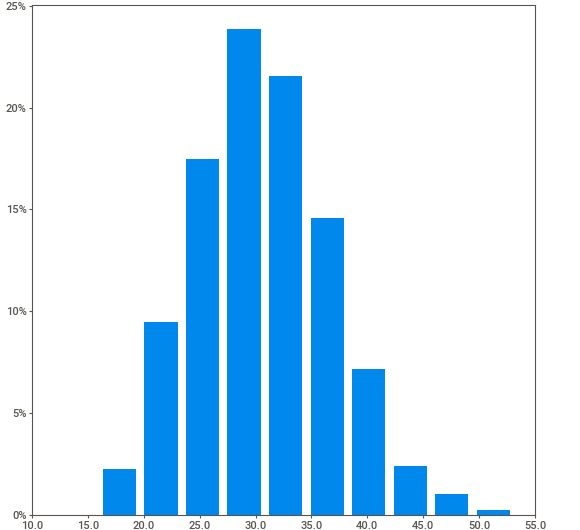
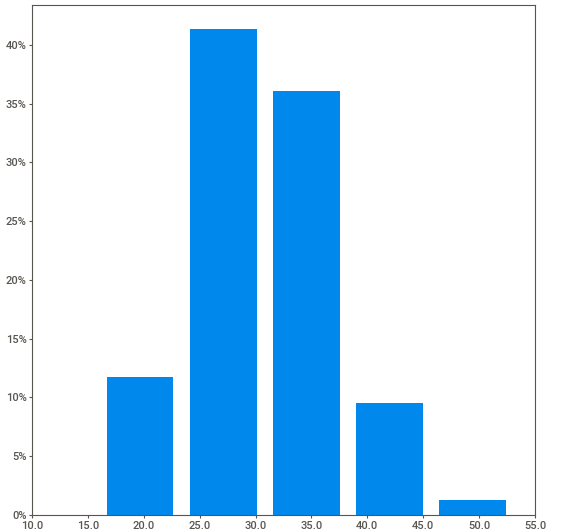
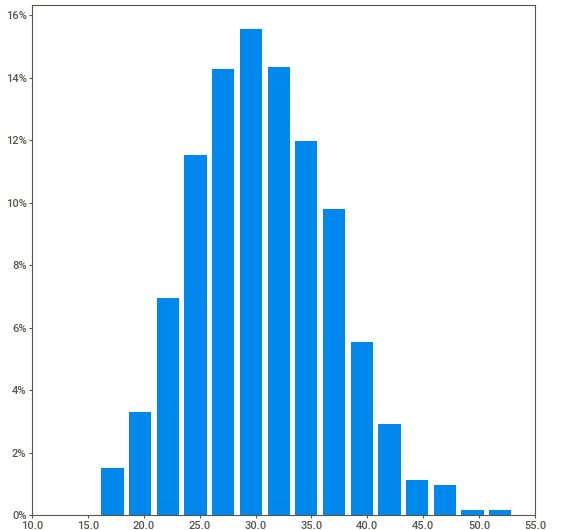
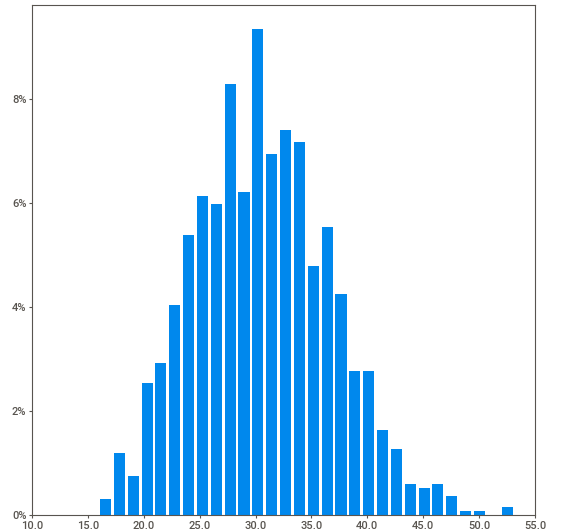
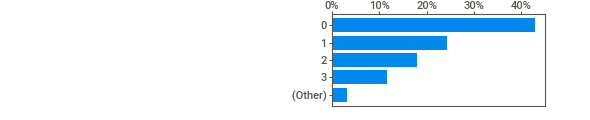
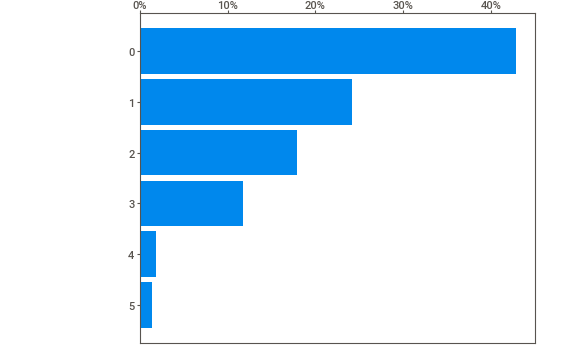
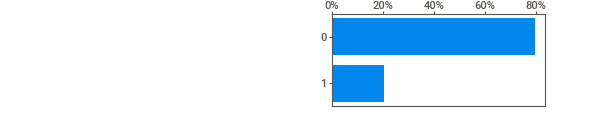
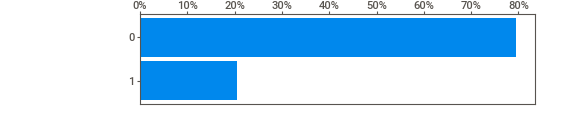
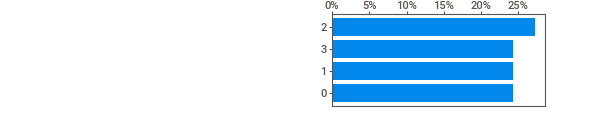
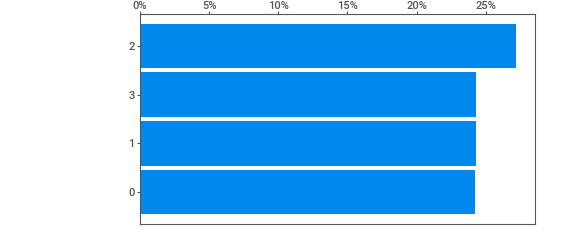
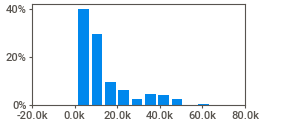
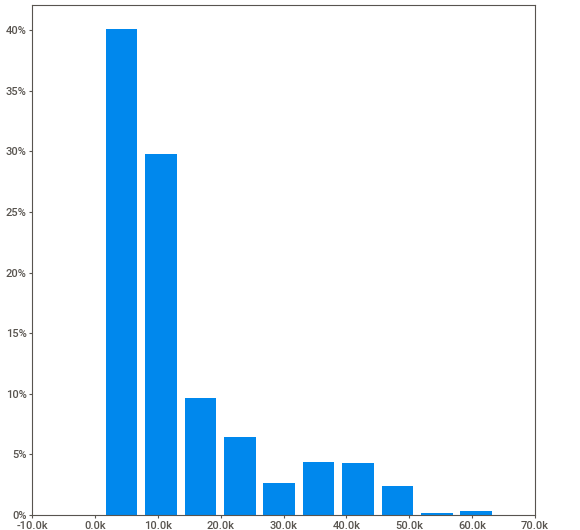
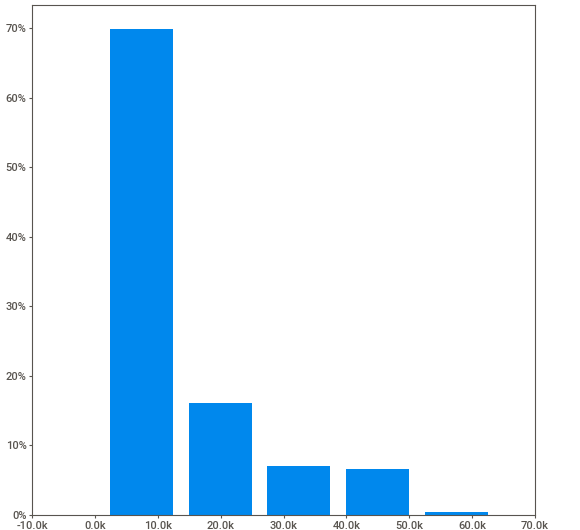
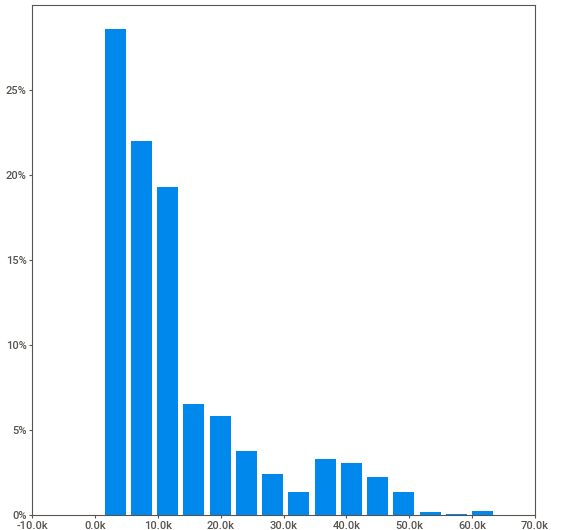
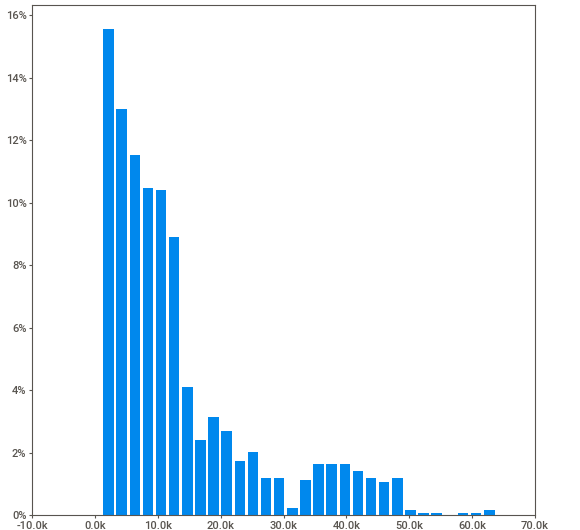
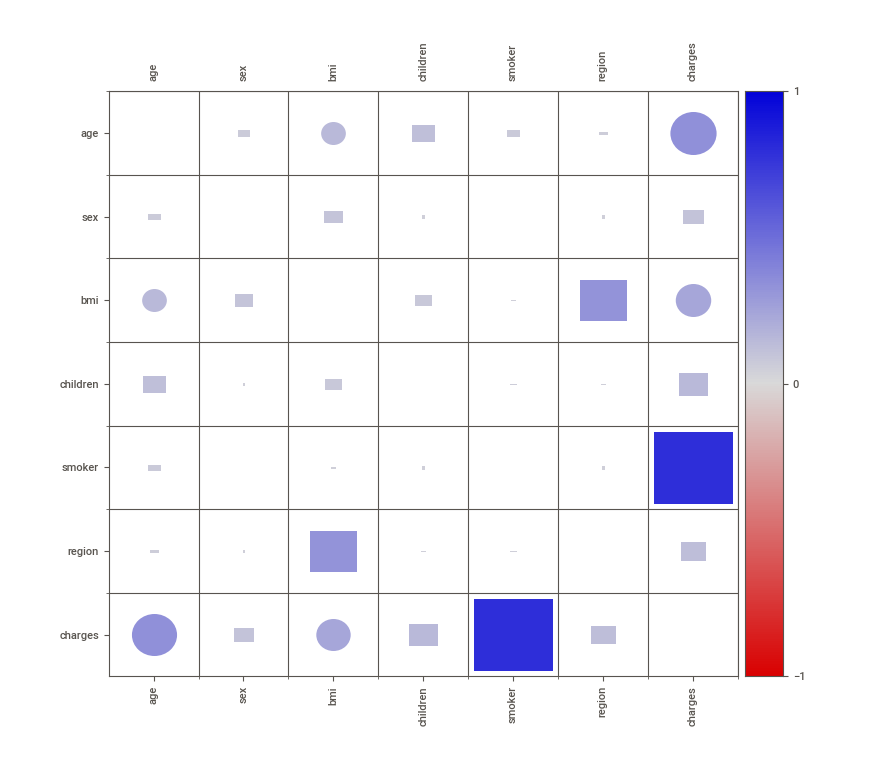
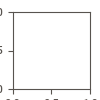

In [92]:
import sweetviz as sv
report = sv.analyze(df)
report.show_notebook()

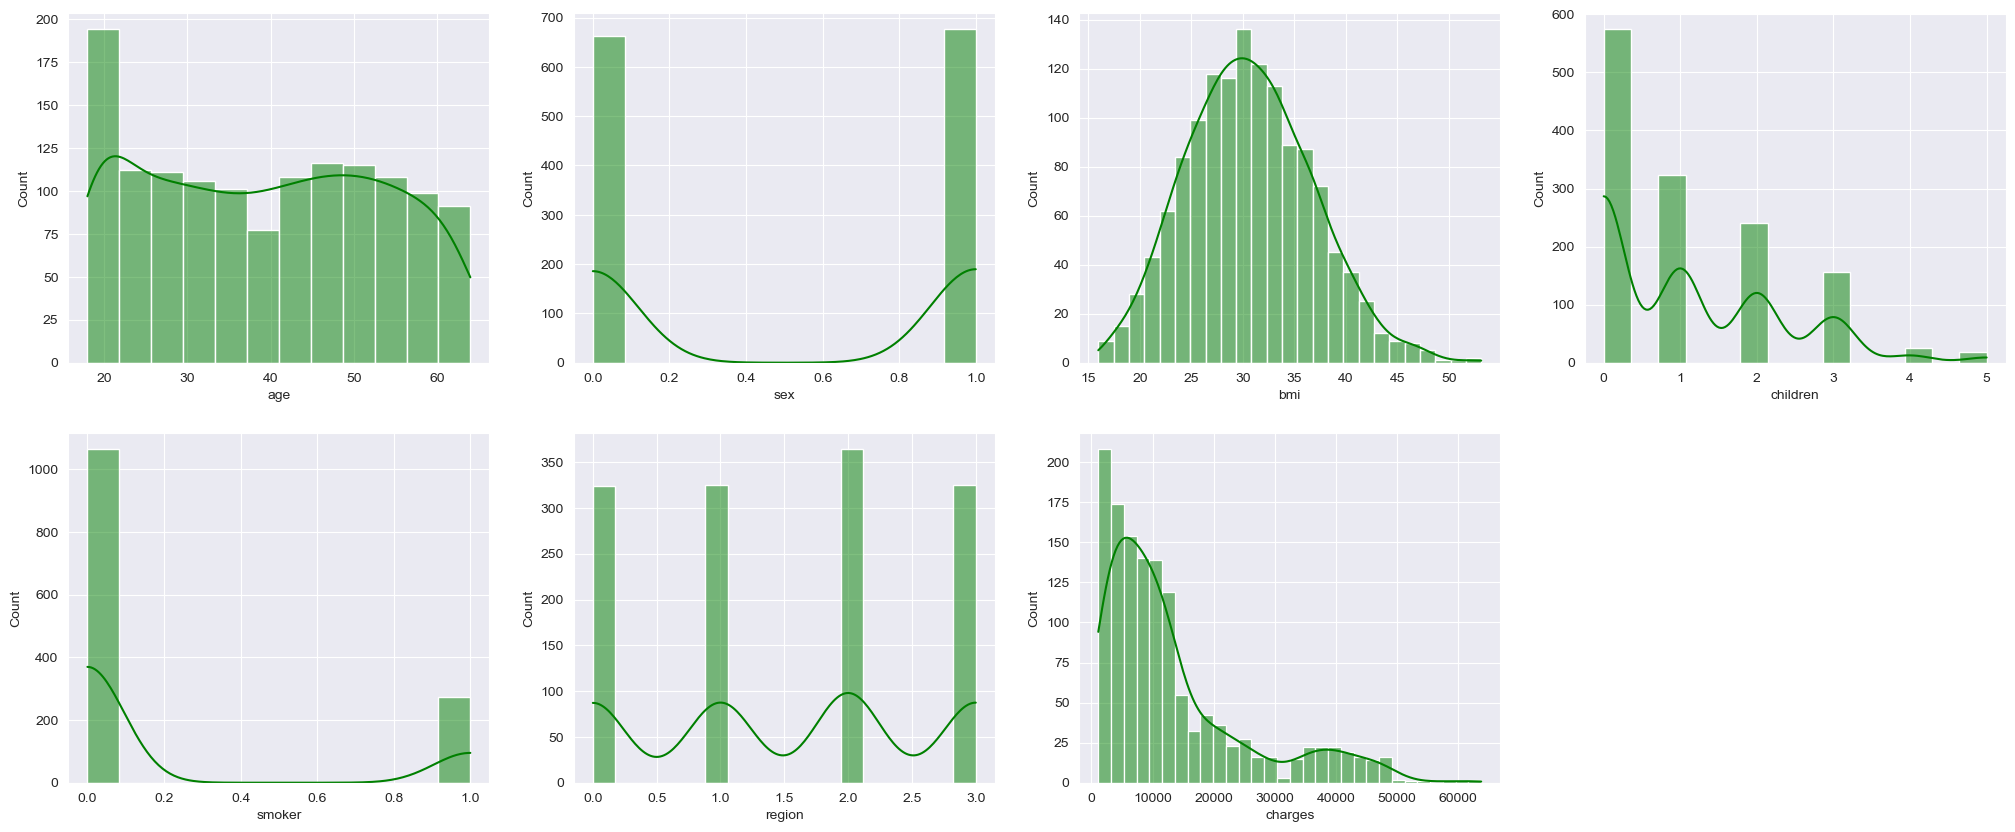

In [91]:
plt.figure(figsize=(25,10))
sns.set_style("darkgrid")
i=1
for col in df.columns:
    plt.subplot(2,4,i)
    sns.histplot(data=df,x=df[col],kde=True,bins='auto',color="Green")
    i+=1
plt.show()

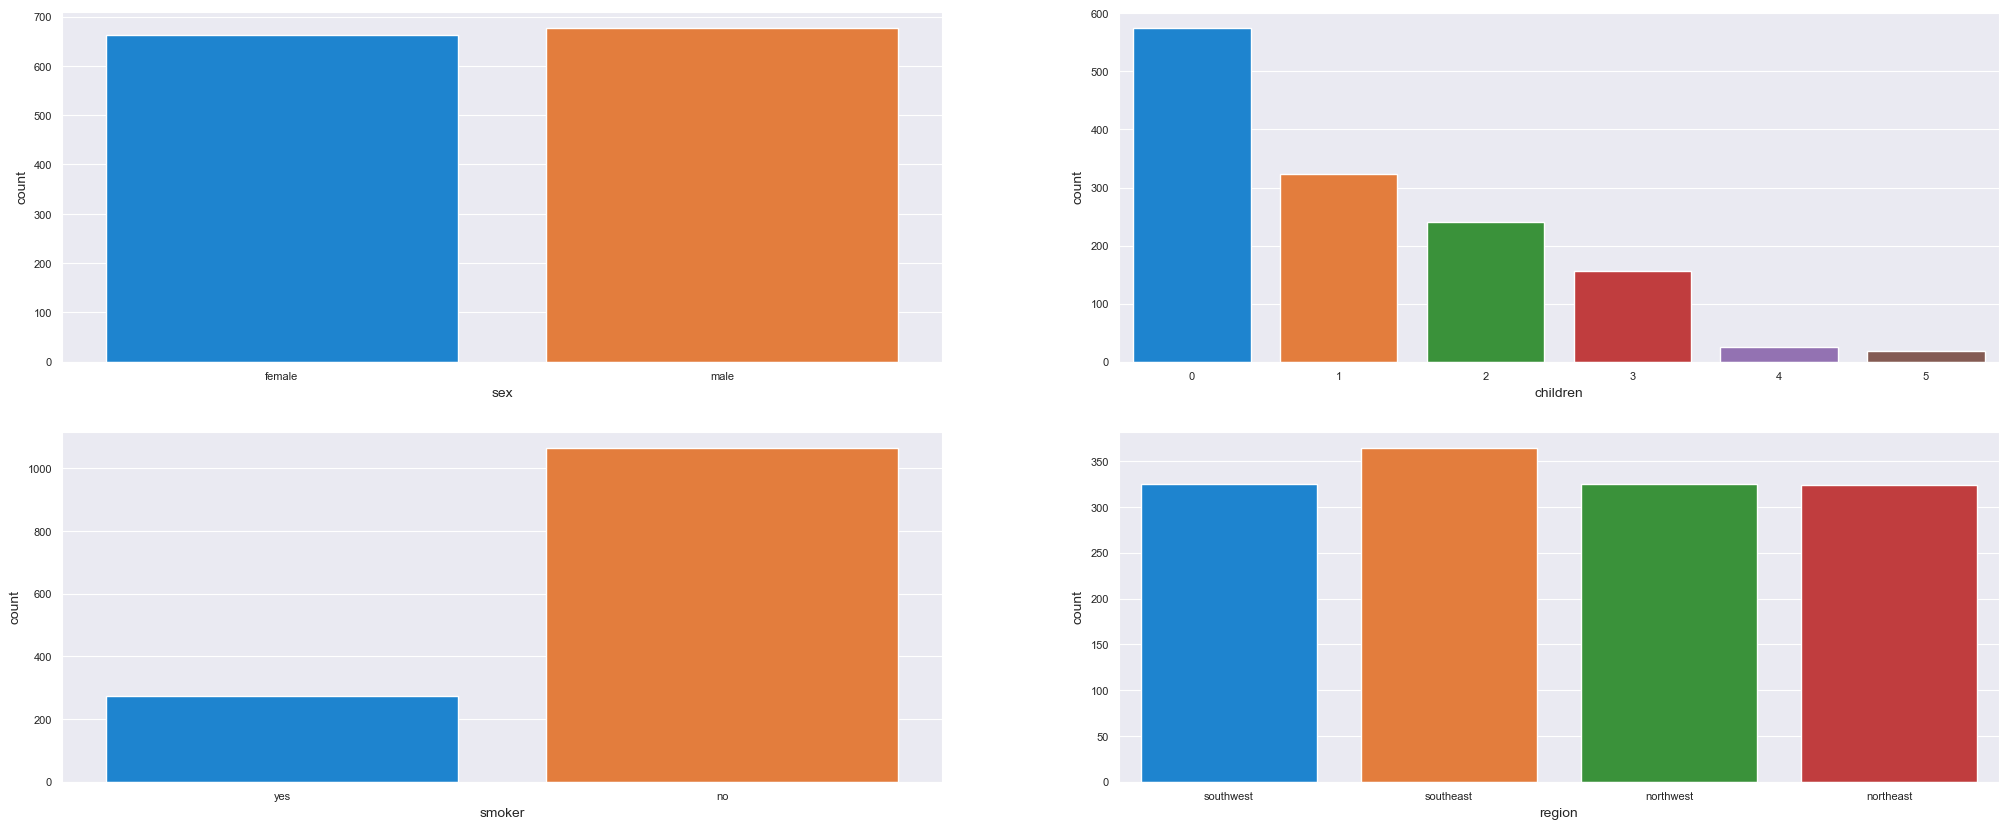

In [11]:
plt.figure(figsize=(25,10))
sns.set_style("darkgrid")

n = df[['sex','children','smoker','region']]
i=1
for col in n.columns:
    plt.subplot(2,2,i)
    sns.countplot(data=n,x=n[col])
    i+=1
plt.show()

*Insights:*
----------
- Almost equal records for both male and female
- Non smoker individual have more number of records compared to smokers,most of the people not smoke and there are more number of male smoker scomparing to female.
- Health insurance price are higher in southeast and lower price are similar

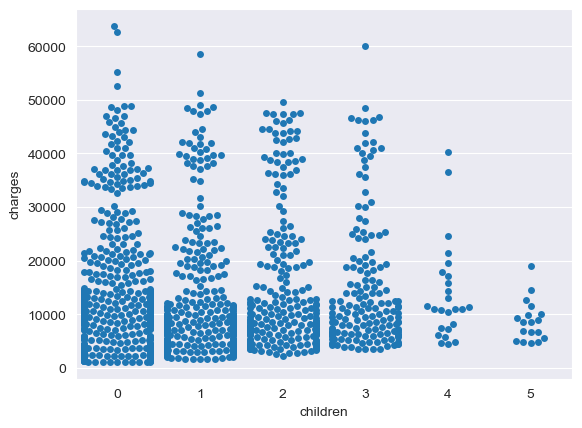

In [90]:
sns.swarmplot(data=df,x='children',y='charges')
plt.show()

There doesn't seem to have a strong trend among this variables but we can see that customer having 5 children have charges incurred in a very specific range of 0 to 20,000$ and majority of customers having any number of children or no children altogether have charges in range of 0-20,000 dollars

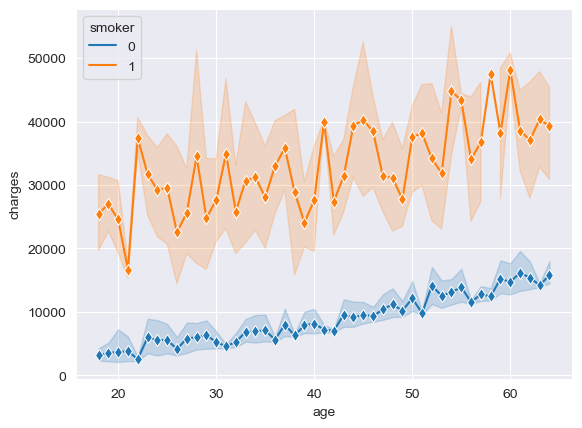

In [89]:
fig= sns.lineplot(x=df.age, y=df.charges, markevery=1, marker='d', data=df, hue=df.smoker)
fig.set(xlabel='age')
plt.show()

- smokers are charged a lot comparing to non smoker
- Non-smokers are charged less than 20,000 while smokers are charged more than 15,000.
- If age increases people who do not smoke tend to have lower health price insurance
- If age decreases people who smoke tend to have higher health price insurance

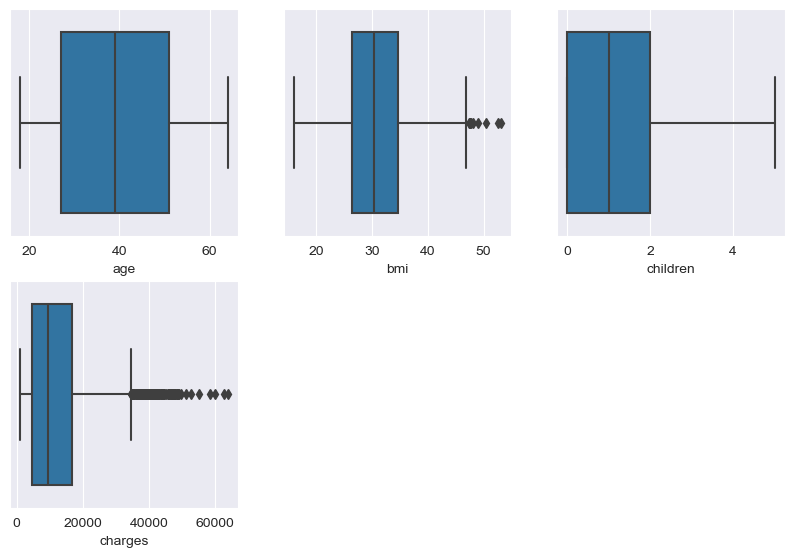

In [88]:
plt.figure(figsize=(10,10))
col=['age','bmi','children','charges']
pltno=1
for i in col:
    plt.subplot(3,3,pltno)
    sns.boxplot(x=i,data=df[col])
    pltno+=1

- Age and children there are  no outliers
- Bmi and  charges has outliers

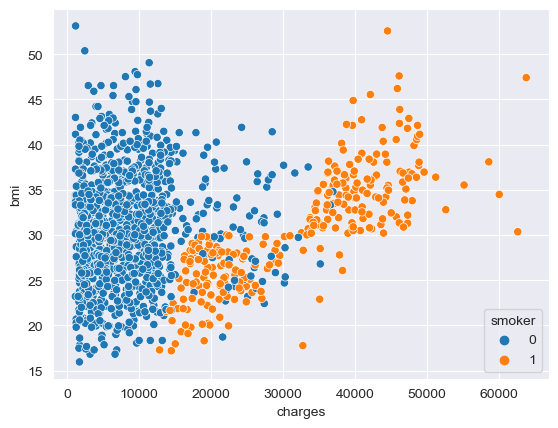

In [87]:
sns.scatterplot(x=df.charges, y=df.bmi, hue=df.smoker)
plt.show()

- It appears that for non-smokers, an increase in BMI doesn't seem to be much related to an increase in health insurance price. 
- However, health insurance price seem to be significantly higher for smokers with a BMI greater than 30.
- As BMI has very less correlation with charges we get a higher loss on a model which predicts charges on the basis of BMI as a independent variable as seen above loss value is increased which is a degradtion in our mode

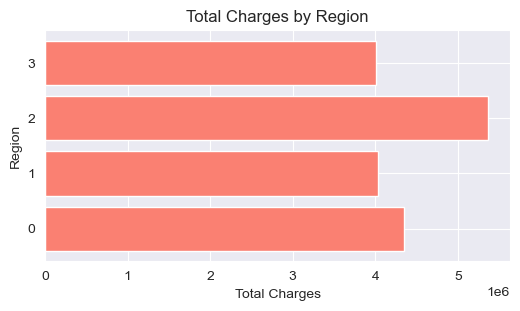

In [86]:
# Calculate total charges by region;

price = df.groupby('region')['charges'].sum().sort_values(ascending=True)

# Create bar plot;

plt.figure(figsize=(6, 3))
plt.barh(price.index, price.values, color='salmon')
plt.xlabel('Total Charges')
plt.ylabel('Region')
plt.title('Total Charges by Region')

plt.show()

- It seems that majority of our customers have 0 or 1 child.
- We can also conclude that people who have more children are given less priority in terms of pricing discounts.
- Having looked at individual columns, we can now visualize the relationship between "charges" (the value we wish to predict) and other columns

*Data Preprocessing:*
------------------

In [9]:
df.isnull().sum()/len(df)*100

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["sex"] = le.fit_transform(df["sex"])
df["smoker"] = le.fit_transform(df["smoker"])
df["region"] = le.fit_transform(df["region"])

In [11]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


*Feature Engineering:*

In [12]:
# Function to detect outliers percentage using IQR;

def cal_out_percentage(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    IQR = q3 - q1
    
    outliers = ( (column <(q1-1.5*IQR))  | (column >(q3+1.5*IQR)) )
    outlier_percentaege = (outliers.sum()/len(column))*100
    return outlier_percentaege
outlier_percentage = df.apply(cal_out_percentage)
print(outlier_percentage)

age          0.000000
sex          0.000000
bmi          0.672646
children     0.000000
smoker      20.478326
region       0.000000
charges     10.388640
dtype: float64


*Feature Engineering:*

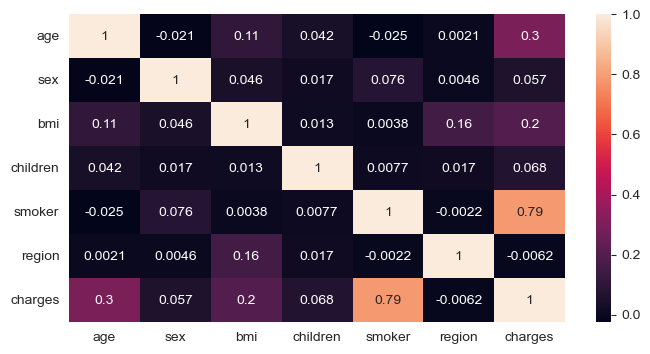

In [13]:
plt.figure(figsize=(8,4))
sns.set_style("darkgrid")

n = df.corr()
sns.heatmap(n,annot=True)
plt.show()

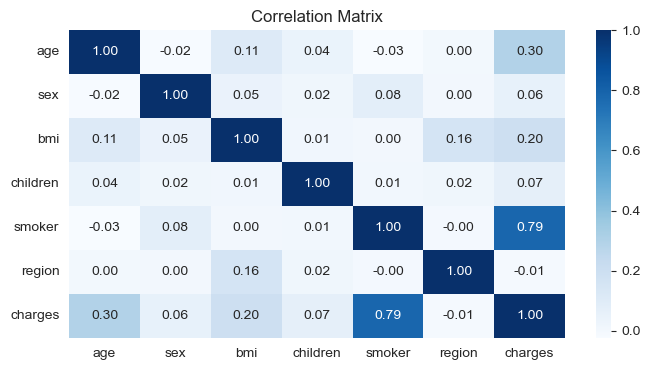

In [85]:
plt.figure(figsize=(8,4))
sns.set_style("darkgrid")

n = df.corr()
sns.heatmap(n,annot=True,cmap="Blues",fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Two matrices as can see gives us as good relation to the charges.i.e age and charges lets use those and implement the model

Split the dataset into train and test:
- We split our data into "test" data and "train" data,using 80 percentage to train the model and using other 20 percentage to test the model

*Split the dataset into train and test sets:*
 -----------------------------

In [15]:
from sklearn.model_selection import train_test_split
x = df.drop(["charges"],axis=1)
y = df.charges

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                test_size=0.2,
                                                train_size=0.8,
                                                random_state=42)                                             

In [17]:
x_train.shape,x_test.shape

((1070, 6), (268, 6))

In [18]:
y_train.shape,y_test.shape

((1070,), (268,))

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtr_scaled = scaler.fit_transform(x_train)
xte_scaled = scaler.transform(x_test)

In [20]:
# Using Linear Regression;

from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(xtr_scaled,y_train)

LinearRegression()

In [21]:
lrte_pred = lr_model.predict(xte_scaled)
lrtr_pred = lr_model.predict(xtr_scaled)

In [22]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print("LINEAR_TRAINING_SCORES:\n===========================")
print("LR_R2_SCORE:",r2_score(y_test,lrte_pred))
print("LR_MSE:",mean_squared_error(y_test,lrte_pred))
print("LR_MAE:",mean_absolute_error(y_test,lrte_pred))

LINEAR_TRAINING_SCORES:
LR_R2_SCORE: 0.7833463107364536
LR_MSE: 33635210.43117844
LR_MAE: 4186.508898366437


In [23]:
print("LINEAR_TRAINING_SCORES:\n===========================")
print("LR_R2_SCORE:",r2_score(y_train,lrtr_pred))
print("LR_MSE:",mean_squared_error(y_train,lrtr_pred))
print("LR_MAE:",mean_absolute_error(y_train,lrtr_pred))

LINEAR_TRAINING_SCORES:
LR_R2_SCORE: 0.7417049283233981
LR_MSE: 37280663.22256598
LR_MAE: 4208.762029186574


- It is Used to determine the linear relationship between the dependent variable (y) and independent variable (x).
- This linear relationship is represented by a straight line called best-fit line.
- This line is the pattern on which the machine has learned from the data.
- r2 give 0.78 score on testing data ,r2 gives 0.74 scores on training data,its is a good model ,this model gives low bias and low variance,it performs well.

*RFR Model:*
---------------
- For our project utilizing Random Forest Regression, consider crafting a description that highlights its strengths and contributions. Here's a sample description:

- "In this project, the implementation of Random Forest Regression has proven to be instrumental in achieving accurate and robust predictions. The ensemble nature of the Random Forest model, combining multiple decision trees, enhances its ability to capture complex relationships within the data. The flexibility and resilience of Random Forest Regression make it well-suited for handling various types of features and mitigating overfitting.

- The model's performance, as evidenced by [insert relevant metric or score], underscores its efficacy in understanding and predicting the target variable. Furthermore, the built-in feature importance analysis of Random Forest provides valuable insights into the significant factors influencing the predictions.

- Despite its success, it's crucial to consider potential limitations and areas for refinement. Exploring hyperparameter tuning or assessing the model's performance on unseen data could be avenues for further improvement. Overall, the implementation of Random Forest Regression stands as a key component in achieving accurate and reliable predictions in this project."

In [53]:
from sklearn.ensemble import RandomForestRegressor
rfr_model = RandomForestRegressor()
rfr_model.fit(x_train,y_train)

RandomForestRegressor()

In [54]:
rfrte_pred = rfr_model.predict(x_test)
rfrtr_pred = rfr_model.predict(x_train)

In [55]:
print("RANDOM FOREST REGRESSOR TESTING MODEL:\n=====================================")
print("RFR_r2_SCORE:",r2_score(y_test,rfrte_pred))
print("RFR_MSE:",mean_squared_error(y_test,rfrte_pred))
print("RFR_MAE:",mean_absolute_error(y_test,rfrte_pred))

RANDOM FOREST REGRESSOR TESTING MODEL:
RFR_r2_SCORE: 0.8616785167349411
RFR_MSE: 21474234.814960964
RFR_MAE: 2503.5517689030785


In [56]:
print("RANDOM FOREST REGRESSOR TRAINING MODEL:\n=====================================")
print("RFR_r2_SCORE:",r2_score(y_train,rfrtr_pred))
print("RFR_MSE:",mean_squared_error(y_train,rfrtr_pred))
print("RFR_MAE:",mean_absolute_error(y_train,rfrtr_pred))

RANDOM FOREST REGRESSOR TRAINING MODEL:
RFR_r2_SCORE: 0.9758167191991214
RFR_MSE: 3490460.5082171652
RFR_MAE: 1040.9113279464254


In [57]:
# Overfitting problem occured

*RFR Hyper parameter tunning :*

In [67]:
# Randomized Search CV;

maxdep = list(range(2,21))
maxdep.append(None)
Params = {
    "n_estimators":[10,20,30,40,50,75,100,150,200],
    "criterion":["squared_error", "absolute_error","friedman_mse"],
    "max_depth":maxdep,
    "min_samples_split":list(range(1,7)),
    "min_samples_leaf":list(range(1,7)),
    "max_features":["sqrt", "log2", None], 
    "bootstrap":[True, False]
}

In [68]:
from sklearn.model_selection import RandomizedSearchCV
rfr1_model = RandomForestRegressor()
rdsv = RandomizedSearchCV(estimator=rfr1_model,param_distributions=Params,
                         scoring="f1_weighted",n_jobs=-1,refit=True,
                          cv=3,verbose=2,n_iter=100,random_state=42)

In [69]:
rdsv.fit(x,y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'friedman_mse'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20,
                                                      None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6],
                                        'n_estimators': [10, 20, 30, 40, 50, 75,
                                                         100, 150, 200]},
                   random_state=42, scoring='f1_weighted', verbose=2)

In [70]:
rdsv.best_params_

{'n_estimators': 10,
 'min_samples_split': 4,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 18,
 'criterion': 'squared_error',
 'bootstrap': True}

In [71]:
rfr_model = RandomForestRegressor( n_estimators=10,
                                 min_samples_split=4,
                                 min_samples_leaf=5,
                                 max_features="sqrt",
                                 max_depth=18,
                                 criterion="squared_error",
                                 bootstrap=True)

In [72]:
rfr_model.fit(x_train,y_train)

RandomForestRegressor(max_depth=18, max_features='sqrt', min_samples_leaf=5,
                      min_samples_split=4, n_estimators=10)

In [73]:
rfrte1_pred = rfr_model.predict(x_test)
rfrtr1_pred = rfr_model.predict(x_train)

In [74]:
print("RANDOM FOREST REGRESSOR TESTING MODEL:\n=====================================")
print("RFR_r2_SCORE:",r2_score(y_test,rfrte1_pred))
print("RFR_MSE:",mean_squared_error(y_test,rfrte1_pred))
print("RFR_MAE:",mean_absolute_error(y_test,rfrte1_pred))

RANDOM FOREST REGRESSOR TESTING MODEL:
RFR_r2_SCORE: 0.831882178842072
RFR_MSE: 26100078.475929156
RFR_MAE: 3413.1113954991592


In [75]:
print("RANDOM FOREST REGRESSOR TRAINING MODEL:\n=====================================")
print("RFR_r2_SCORE:",r2_score(y_train,rfrtr1_pred))
print("RFR_MSE:",mean_squared_error(y_train,rfrtr1_pred))
print("RFR_MAE:",mean_absolute_error(y_train,rfrtr1_pred))

RANDOM FOREST REGRESSOR TRAINING MODEL:
RFR_r2_SCORE: 0.8633905769837069
RFR_MSE: 19717332.8141391
RFR_MAE: 2976.384936640644


The accuracy of random forest regression is R2 score = 0.86 percentage

*GBR Model :*
----------
Gradient Boosting Regression is a powerful machine learning technique for regression tasks. It works by sequentially fitting weak learners, usually decision trees, to the residuals of the previous predictions, gradually improving the model's accuracy.

This iterative process combines the strengths of multiple weak models, creating a robust ensemble that excels in capturing complex relationships within the data. In your project, implementing Gradient Boosting Regression can enhance predictive performance and handle non-linear patterns effectively.

In [80]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

In [81]:
gbrte_pred = gbr.predict(x_test)
gbrtr_pred = gbr.predict(x_train)

In [82]:
print("GRADIENT BOOSTING REGRESSOR TESTING MODEL:\n========================================")
print("GBR_r2_score:",r2_score(y_test,gbrte_pred))
print("GBR_MSE:",mean_squared_error(y_test,gbrte_pred))
print("GBR_MAE:",mean_absolute_error(y_test,gbrte_pred))

GRADIENT BOOSTING REGRESSOR TESTING MODEL:
GBR_r2_score: 0.8779726251291786
GBR_MSE: 18944595.15596614
GBR_MAE: 2447.951558054584


In [83]:
print("GRADIENT BOOSTING REGRESSOR TRAINING MODEL:\n========================================")
print("GBR_r2_score:",r2_score(y_train,gbrtr_pred))
print("GBRTE_MSE:",mean_squared_error(y_train,gbrtr_pred))
print("GBRTE_MAE:",mean_absolute_error(y_train,gbrtr_pred))

GRADIENT BOOSTING REGRESSOR TRAINING MODEL:
GBR_r2_score: 0.8980459663933704
GBRTE_MSE: 14715394.941138722
GBRTE_MAE: 2101.3617006224317


Gradient Boosting Regression accuracy  of R2 score is 0.87 percentage

*XGBR  MODEL :*
-------------
XGBoost (Extreme Gradient Boosting) Regression is an advanced variation of Gradient Boosting Regression, known for its efficiency and high performance. 

It incorporates regularization techniques and parallel processing to optimize the boosting process, resulting in faster training and improved accuracy. XGBoost excels in handling large datasets, providing feature importance insights, and offering customizable parameters for fine-tuning. 

In our regressor project, leveraging XGBoost can enhance predictive capabilities and contribute to achieving superior regression results.

In [76]:
from xgboost import XGBRegressor
xgbr = XGBRegressor()
xgbr.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [77]:
xgbrte_pred = xgbr.predict(x_test)
xgbrtr_pred = xgbr.predict(x_train)

In [78]:
print("XGBOOST REGRESSOR TESTING MODEL:\n==================================")
print("XGB_R2_SCORE:",r2_score(y_test,xgbrte_pred))
print("XGB_MSE:",mean_squared_error(y_test,xgbrte_pred))
print("XGB_MAE:",mean_absolute_error(y_test,xgbrte_pred))

XGBOOST REGRESSOR TESTING MODEL:
XGB_R2_SCORE: 0.8501678977480663
XGB_MSE: 23261243.811358407
XGB_MAE: 2791.8325179517183


In [79]:
print("XGBOOST REGRESSOR TRAINING MODEL:\n==================================")
print("XGB_R2_SCORE:",r2_score(y_train,xgbrtr_pred))
print("XGB_MSE:",mean_squared_error(y_train,xgbrtr_pred))
print("XGB_MAE:",mean_absolute_error(y_train,xgbrtr_pred))

XGBOOST REGRESSOR TRAINING MODEL:
XGB_R2_SCORE: 0.9941387967942534
XGB_MSE: 845968.6875715746
XGB_MAE: 499.3391555280192


The accuracy of xgbclassifier is R2 score = 0.85 percentage

*DTR MODEL:*
---------
Decision Tree Regression is a versatile machine learning algorithm for regression tasks. It works by recursively partitioning the dataset into subsets based on feature conditions, creating a tree structure.

Each leaf node in the tree represents a predicted output value. Decision trees excel at capturing non-linear relationships and handling complex interactions among features.

In your regressor project, implementing Decision Tree Regression can offer interpretability, simplicity, and the ability to visualize the decision-making process, making it a valuable tool for understanding and predicting numerical outcomes.

In [25]:
from sklearn.tree import DecisionTreeRegressor
dtr_model = DecisionTreeRegressor()
dtr_model.fit(x_train,y_train)

DecisionTreeRegressor()

In [26]:
dtrte_pred = dtr_model.predict(x_test)
dtrtr_pred = dtr_model.predict(x_train)

In [27]:
print("DECISION TREE REGRESSOR TESTING MODEL:\n======================================")
print("DTR_r2_SCORE:",r2_score(y_test,dtrte_pred))
print("DTR_MSE:",mean_squared_error(y_test,dtrte_pred))
print("DTR_MAE:",mean_absolute_error(y_test,dtrte_pred))

DECISION TREE REGRESSOR TESTING MODEL:
DTR_r2_SCORE: 0.7094839844445247
DTR_MSE: 45102242.89303189
DTR_MAE: 3043.246829772388


In [28]:
print("DECISION TREE REGRESSOR TRAINING MODEL:\n======================================")
print("DTR_r2_SCORE:",r2_score(y_train,dtrtr_pred))
print("DTR_MSE:",mean_squared_error(y_train,dtrtr_pred))
print("DTR_MAE:",mean_absolute_error(y_train,dtrtr_pred))

DECISION TREE REGRESSOR TRAINING MODEL:
DTR_r2_SCORE: 0.9983078124756305
DTR_MSE: 244239.5543823394
DTR_MAE: 29.572515327102803


In [50]:
# Overfitting problem occured

*DTR Hyper parameter tunning:*

In [34]:
from sklearn.model_selection import GridSearchCV
params_gird = {"criterion" : [ 'friedman_mse', 'squared_error', 'absolute_error'],
               "max_depth" :list(range(2,21)),
               "min_samples_split":[2,3,4,5,6],
               "min_samples_leaf":[1,2,3,4,5,6],
               "max_features":["sqrt","log2",None]
               }
dtr1_model = DecisionTreeRegressor()

In [35]:
gridcv = GridSearchCV(
    estimator = dtr1_model,param_grid = params_gird,scoring = "f1_weighted", n_jobs = -1, refit=True,cv = 3,verbose=2 )

In [36]:
gridcv.fit(x,y)

Fitting 3 folds for each of 10260 candidates, totalling 30780 fits


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error',
                                       'absolute_error'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4, 5, 6],
                         'splitter': ['best', 'random']},
             scoring='f1_weighted', verbose=2)

In [37]:
gridcv.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 2,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [45]:
dtr_model = DecisionTreeRegressor(criterion='friedman_mse',max_depth=2,
                    max_features = "sqrt",min_samples_leaf=1,min_samples_split=2)

In [46]:
dtr_model.fit(x_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=2,
                      max_features='sqrt')

In [47]:
rfrhypte_pred = dtr_model.predict(x_test)
rfrhyptr_pred = dtr_model.predict(x_train)

In [51]:
print("DECISION TREE REGRESION TESTING MODEL:\n=====================================")
print("DTR_r2_SCORE:",r2_score(y_test,rfrhypte_pred))
print("DTR_MSE:",mean_squared_error(y_test,rfrhypte_pred))
print("DTR_MAE:",mean_absolute_error(y_test,rfrhypte_pred))

DECISION TREE REGRESION TESTING MODEL:
DTR_r2_SCORE: 0.7800987358040068
DTR_MSE: 34139392.31986529
DTR_MAE: 4494.915114692437


In [52]:
print("DECISION TREE REGRESION  TRAINING MODEL:\n=====================================")
print("DTR_r2_SCORE",r2_score(y_train,rfrhyptr_pred))
print("DTR_MSE:",mean_squared_error(y_train,rfrhyptr_pred))
print("DTR_MAE:",mean_absolute_error(y_train,rfrhyptr_pred))

DECISION TREE REGRESION  TRAINING MODEL:
DTR_r2_SCORE 0.7597240645765193
DTR_MSE: 34679896.023046106
DTR_MAE: 4407.188212579678


The accuracy of decision tree regression with hyper parameter tunning is R2 score = 0.78 percentage

*Model Comparision Report:*
-----------------------
​
After an in-depth exploration of multiple regression models for our machine learning regression problem, the project culminates with a comprehensive analysis of the model performances. The key findings are summarized below:
​
1. *Linear Regression (R2 score = 0.78):*
   - Demonstrates a linear relationship, providing a solid baseline performance.

​
2. *Random Forest Regression (R2 score = 0.86):*
   - Achieves an impressive R2 score, indicating a robust ensemble approach.
   - Notably, further hyperparameter tuning did not yield significant improvements, emphasizing the effectiveness of the default configuration.
   
4. *Gradient Boosting Regression (R2 score = 0.87):*
   - Emerges as the top-performing model, attaining the highest R2 score among all models.
   - Demonstrates exceptional predictive accuracy and resilience in capturing intricate data patterns.
​
5. *XGBoost Regression (R2 score = 0.85):*
   - Exhibits strong predictive power, with a performance on par with Random Forest Regression
   
6. *DecisionTree Regression (R2 score = 0.78):*
   - Shows a high degree of flexibility, effectively capturing non-linear relationships.
​
*Conclusion:*
​
The Gradient Boosting Regression model stands out as the optimal choice for our regression problem, delivering unparalleled predictive performance with an R2 score of 0.87. While Random Forest Regression also performs admirably with a high R2 score of 0.86, its superiority over the default hyperparameters implies a robust and efficient algorithm.
​
The findings underscore the significance of careful model selection and parameter tuning in machine learning projects. The project's success is marked by the identification of a high-performing model that aligns with the specific characteristics of the dataset, paving the way for informed decision-making based on reliable predictions.

*Report on Challenges Faced in Machine Learning Regression Problem:*
-------------------------------------------
 - Explore the data and find correlation between inputs and targets
 - Pick the right model,loss function and optimizer for the problem at hand
 - Scale numeric variables and label encode for categorical columns
 - Set side a test set (Using a fraction of the training set)
 - Train the model
 - Make prediction on the test set and compute the loss.